Extra Data : https://jatim.bps.go.id/indicator/23/344/1/persentase-penduduk-miskin-menurut-provinsi-.html (Data Terlampir Dalam Report)


# **Import Library**

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs

import warnings
warnings.filterwarnings("ignore")


# Sebaran Kasus Stunting Tahun 2021

In [2]:
sebaran_stunting_2021 = requests.get("https://aksi.bangda.kemendagri.go.id/emonev/DashPrev/index/3", verify=False).text

In [3]:
sebaran_stunting_2021_soup = bs (sebaran_stunting_2021, "lxml")
stunting = sebaran_stunting_2021_soup.find_all('thead')
stunting

[<thead class="bg-warning-transparent">
 <tr>
 <th class="text-vertical-center text-uppercase text-center" rowspan="2" style="width: 10px"><span class="tx-16 tx-bold">No</span></th>
 <th class="text-vertical-center text-uppercase" rowspan="2" style=""><span class="tx-16 tx-bold">Provinsi</span></th>
 <th class="text-vertical-center text-uppercase text-center" rowspan="2" style="width: 10px"><span class="tx-16 tx-bold">Jumlah Balita <br/><small>(anak)</small></span></th>
 <th class="text-vertical-center text-center text-uppercase" colspan="2"><span class="tx-16 tx-bold">Stunting</span></th>
 <th class="text-vertical-center text-center text-uppercase" rowspan="2" style="width: 10px"><span class="tx-16 tx-bold">Persentase Kasus Stunting <br/><small>(%)</small></span></th>
 </tr>
 <tr>
 <td class="text-vertical-center text-uppercase text-center" style="width: 10px"><span class="tx-14 tx-bold">Pendek <br/><small>(anak)</small></span></td>
 <td class="text-vertical-center text-uppercase text

In [4]:
tbody_2021 = sebaran_stunting_2021_soup.find('tbody')

data_2021 = []

# Loop setiap baris dalam </tbody>
for row in tbody_2021.find_all('tr') :
    columns = row.find_all('td')
    provinsi = columns[1].text.strip()
    jumlah_balita = int(columns[2].text.strip().replace(',', ''))
    stunting_pendek = int(columns[3].text.strip().replace(',', ''))
    stunting_sangat_pendek = int(columns[4].text.strip().replace(',', ''))
    persentase_stunting = float(columns[5].text.strip())

    data_2021.append([provinsi, jumlah_balita, stunting_pendek, stunting_sangat_pendek, persentase_stunting])

In [5]:
# Buat Dataframe Dari data_2021
df_2021 = pd.DataFrame(data_2021, columns=['Provinsi', 'Jumlah Balita', 'Junlah Balita Penderita Stunting (Pendek)', 'Junlah Balita Penderita Stunting (Sangat Pendek)', 'Persentase Stunting %'])

# Menambahkan Kolom 'Jumlah Total Balita Penderita Stunting' setelah kolom 'Stunting (Sangat Pendek)'
df_2021.insert(df_2021.columns.get_loc('Junlah Balita Penderita Stunting (Sangat Pendek)') + 1, 'Jumlah Total Balita Penderita Stunting', df_2021['Junlah Balita Penderita Stunting (Pendek)'] + df_2021['Junlah Balita Penderita Stunting (Sangat Pendek)'])

df_2021


,Provinsi,Jumlah Balita,Junlah Balita Penderita Stunting (Pendek),Junlah Balita Penderita Stunting (Sangat Pendek),Jumlah Total Balita Penderita Stunting,Persentase Stunting %
0,ACEH,273612,23128,9889,33017,12.1
1,SUMATERA UTARA,749867,31384,18833,50217,6.7
2,SUMATERA BARAT,243596,27495,9271,36766,15.1
3,RIAU,394324,17531,6256,23787,6.0
4,JAMBI,151086,3375,1181,4556,3.0
5,SUMATERA SELATAN,385039,12054,4910,16964,4.4
6,BENGKULU,52920,2855,505,3360,6.3
7,LAMPUNG,484108,22026,7491,29517,6.1
8,KEPULAUAN BANGKA BELITUNG,58252,2727,728,3455,5.9
9,KEPULAUAN RIAU,81226,4492,1619,6111,7.5


In [6]:
# Export Dataframe ke Excel
# df_2021.to_excel('sebaran_data_stunting_2021.xlsx', index=False)

# Sebaran Kasus Stunting Tahun 2022

In [7]:
sebaran_stunting_2022 = requests.get("https://aksi.bangda.kemendagri.go.id/emonev/DashPrev/index/4", verify=False).text

In [8]:
sebaran_stunting_2022_soup = bs (sebaran_stunting_2022, "lxml")

In [9]:
tbody_2022 = sebaran_stunting_2022_soup.find('tbody')

data_2022 = []

# Loop setiap baris dalam </tbody>
for row in tbody_2022.find_all('tr') :
    columns = row.find_all('td')
    provinsi = columns[1].text.strip()
    jumlah_balita = int(columns[2].text.strip().replace(',', ''))
    stunting_pendek = int(columns[3].text.strip().replace(',', ''))
    stunting_sangat_pendek = int(columns[4].text.strip().replace(',', ''))
    persentase_stunting = float(columns[5].text.strip())

    data_2022.append([provinsi, jumlah_balita, stunting_pendek, stunting_sangat_pendek, persentase_stunting])

In [10]:
# Buat Dataframe Dari data_2022
df_2022 = pd.DataFrame(data_2022, columns=['Provinsi', 'Jumlah Balita', 'Junlah Balita Penderita Stunting (Pendek)', 'Junlah Balita Penderita Stunting (Sangat Pendek)', 'Persentase Stunting %'])

# Menambahkan Kolom 'Jumlah Total Balita Penderita Stunting' setelah kolom 'Stunting (Sangat Pendek)'
df_2022.insert(df_2022.columns.get_loc('Junlah Balita Penderita Stunting (Sangat Pendek)') + 1, 'Jumlah Total Balita Penderita Stunting', df_2022['Junlah Balita Penderita Stunting (Pendek)'] + df_2022['Junlah Balita Penderita Stunting (Sangat Pendek)'])

df_2022

,Provinsi,Jumlah Balita,Junlah Balita Penderita Stunting (Pendek),Junlah Balita Penderita Stunting (Sangat Pendek),Jumlah Total Balita Penderita Stunting,Persentase Stunting %
0,ACEH,415223,24944,8291,33235,8.0
1,SUMATERA UTARA,885988,32089,16733,48822,5.5
2,SUMATERA BARAT,348522,27846,8112,35958,10.3
3,RIAU,418300,13280,4152,17432,4.2
4,JAMBI,239147,6836,2878,9714,4.1
5,SUMATERA SELATAN,590994,13655,4689,18344,3.1
6,BENGKULU,116001,4656,946,5602,4.8
7,LAMPUNG,520923,18609,4941,23550,4.5
8,KEPULAUAN BANGKA BELITUNG,104378,3214,863,4077,3.9
9,KEPULAUAN RIAU,110753,4112,1284,5396,4.9


In [11]:
# Export Dataframe ke Excel
# df_2022.to_excel('sebaran_data_stunting_2022.xlsx', index=False)

# Sebaran Kasus Stunting Tahun 2023

In [12]:
sebaran_stunting_2023 = requests.get("https://aksi.bangda.kemendagri.go.id/emonev/DashPrev/index/5", verify=False).text

In [13]:
sebaran_stunting_2023_soup = bs (sebaran_stunting_2023, "lxml")

In [14]:
tbody_2023 = sebaran_stunting_2023_soup.find('tbody')

data_2023 = []

# Loop setiap baris dalam </tbody>
for row in tbody_2023.find_all('tr') :
    columns = row.find_all('td')
    provinsi = columns[1].text.strip()
    jumlah_balita = int(columns[2].text.strip().replace(',', ''))
    stunting_pendek = int(columns[3].text.strip().replace(',', ''))
    stunting_sangat_pendek = int(columns[4].text.strip().replace(',', ''))
    persentase_stunting = float(columns[5].text.strip())

    data_2023.append([provinsi, jumlah_balita, stunting_pendek, stunting_sangat_pendek, persentase_stunting])

In [15]:
# Buat Dataframe Dari data_2023
df_2023 = pd.DataFrame(data_2023, columns=['Provinsi', 'Jumlah Balita', 'Junlah Balita Penderita Stunting (Pendek)', 'Junlah Balita Penderita Stunting (Sangat Pendek)', 'Persentase Stunting %'])

# Menambahkan Kolom 'Jumlah Total Balita Penderita Stunting' setelah kolom 'Stunting (Sangat Pendek)'
df_2023.insert(df_2023.columns.get_loc('Junlah Balita Penderita Stunting (Sangat Pendek)') + 1, 'Jumlah Total Balita Penderita Stunting', df_2023['Junlah Balita Penderita Stunting (Pendek)'] + df_2023['Junlah Balita Penderita Stunting (Sangat Pendek)'])

df_2023

,Provinsi,Jumlah Balita,Junlah Balita Penderita Stunting (Pendek),Junlah Balita Penderita Stunting (Sangat Pendek),Jumlah Total Balita Penderita Stunting,Persentase Stunting %
0,ACEH,392733,22302,7009,29311,7.5
1,SUMATERA UTARA,893706,29736,10417,40153,4.5
2,SUMATERA BARAT,393475,27742,7028,34770,8.8
3,RIAU,373092,8376,2687,11063,3.0
4,JAMBI,210739,5734,2013,7747,3.7
5,SUMATERA SELATAN,608963,8085,2900,10985,1.8
6,BENGKULU,114545,4193,928,5121,4.5
7,LAMPUNG,530564,15816,5062,20878,3.9
8,KEPULAUAN BANGKA BELITUNG,106202,2602,797,3399,3.2
9,KEPULAUAN RIAU,121877,3485,1105,4590,3.8


In [16]:
# Export Dataframe ke Excel
# df_2023.to_excel('sebaran_data_stunting_2023.xlsx', index=False)

In [17]:
# Menghitung rata-rata persentase stunting dari masing-masing tahun untuk setiap provinsi
rata_rata_2021_provinsi = df_2021.groupby('Provinsi')['Persentase Stunting %'].mean()
rata_rata_2022_provinsi = df_2022.groupby('Provinsi')['Persentase Stunting %'].mean()
rata_rata_2023_provinsi = df_2023.groupby('Provinsi')['Persentase Stunting %'].mean()

# Menghitung rata-rata persentase stunting dalam 3 tahun untuk setiap provinsi
rata_rata_3_tahun_provinsi = (rata_rata_2021_provinsi + rata_rata_2022_provinsi + rata_rata_2023_provinsi) / 3

In [18]:
# Buat DataFrame dari rata_rata_3_tahun_provinsi
rata_rata_df_provinsi = pd.DataFrame({'Provinsi': rata_rata_3_tahun_provinsi.index, '% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun': rata_rata_3_tahun_provinsi.values})

rata_rata_df_provinsi['% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun'] = rata_rata_df_provinsi['% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun'].round(2)
rata_rata_df_provinsi


,Provinsi,% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun
0,ACEH,9.20
1,BALI,4.23
2,BANTEN,5.83
3,BENGKULU,5.20
4,DI YOGYAKARTA,9.57
5,DKI JAKARTA,1.80
6,GORONTALO,7.07
7,JAMBI,3.60
8,JAWA BARAT,7.17
9,JAWA TENGAH,9.17


### 5 Provinsi dengan rata - rata persentase balita penderita stunting tertinggi selama 3 tahun

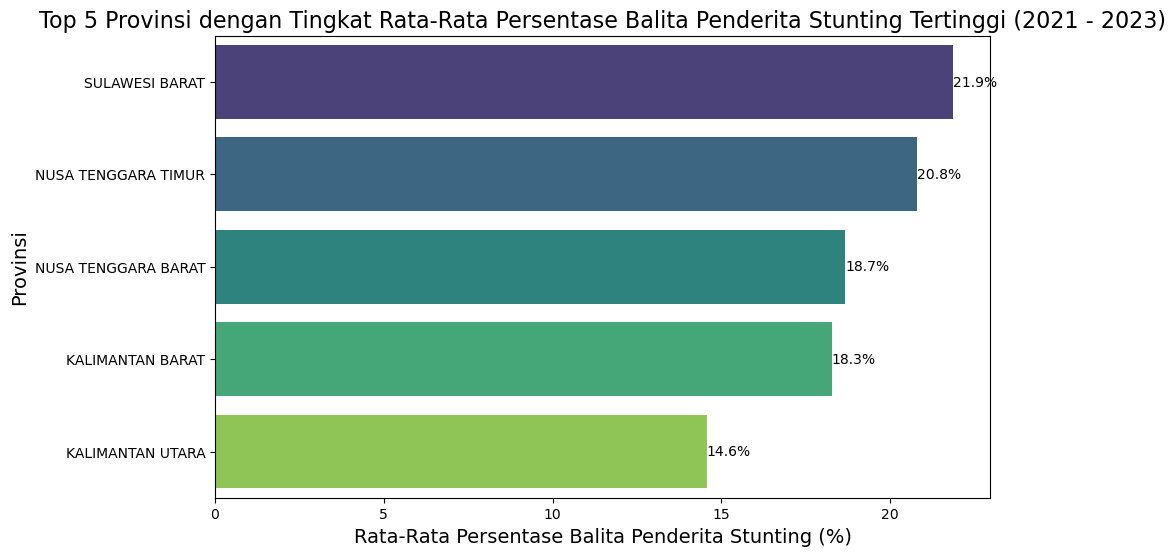

In [19]:
# Mengurutkan dataframe berdasarkan tingkat rata-rata persentase balita penderita stunting tertinggi
top_provinsi = rata_rata_df_provinsi.sort_values(by='% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun', ascending=False).head(5)

# Ploting Grafik
plt.figure(figsize=(10, 6))
sns.barplot(x='% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun', y='Provinsi', data=top_provinsi, palette='viridis')

for i, val in enumerate(top_provinsi['% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun']):
    plt.text(val, i, f'{val:.1f}%', fontsize=10, va='center')


plt.title('Top 5 Provinsi dengan Tingkat Rata-Rata Persentase Balita Penderita Stunting Tertinggi (2021 - 2023)', fontsize=16)
plt.xlabel('Rata-Rata Persentase Balita Penderita Stunting (%)', fontsize=14)
plt.ylabel('Provinsi', fontsize=14)
plt.show()

### 3 Provinsi dengan rata - rata persentase balita penderita stunting terendah selama 3 tahun

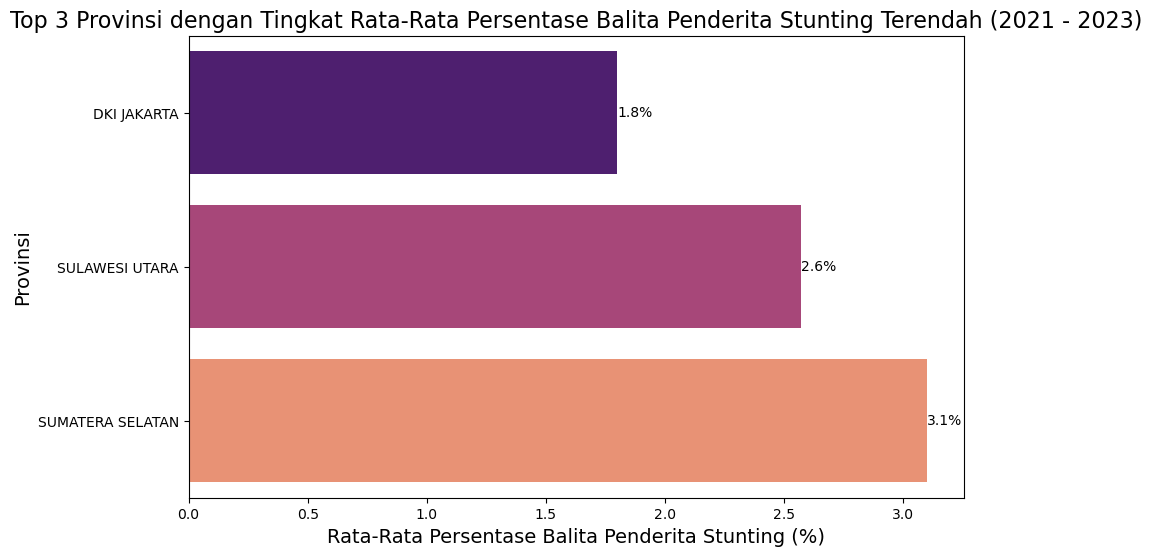

In [20]:
bottom_provinsi = rata_rata_df_provinsi.sort_values(by='% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun').head(3)

# Ploting Grafik
plt.figure(figsize=(10, 6))
sns.barplot(x='% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun', y='Provinsi', data=bottom_provinsi, palette='magma')

for i, val in enumerate(bottom_provinsi['% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun']):
    plt.text(val, i, f'{val:.1f}%', fontsize=10, va='center')


plt.title('Top 3 Provinsi dengan Tingkat Rata-Rata Persentase Balita Penderita Stunting Terendah (2021 - 2023)', fontsize=16)
plt.xlabel('Rata-Rata Persentase Balita Penderita Stunting (%)', fontsize=14)
plt.ylabel('Provinsi', fontsize=14)
plt.show()

### Perbandingan % rata-Rata balita penderita stunting dalam 3 tahun antar provinsi di pulau jawa

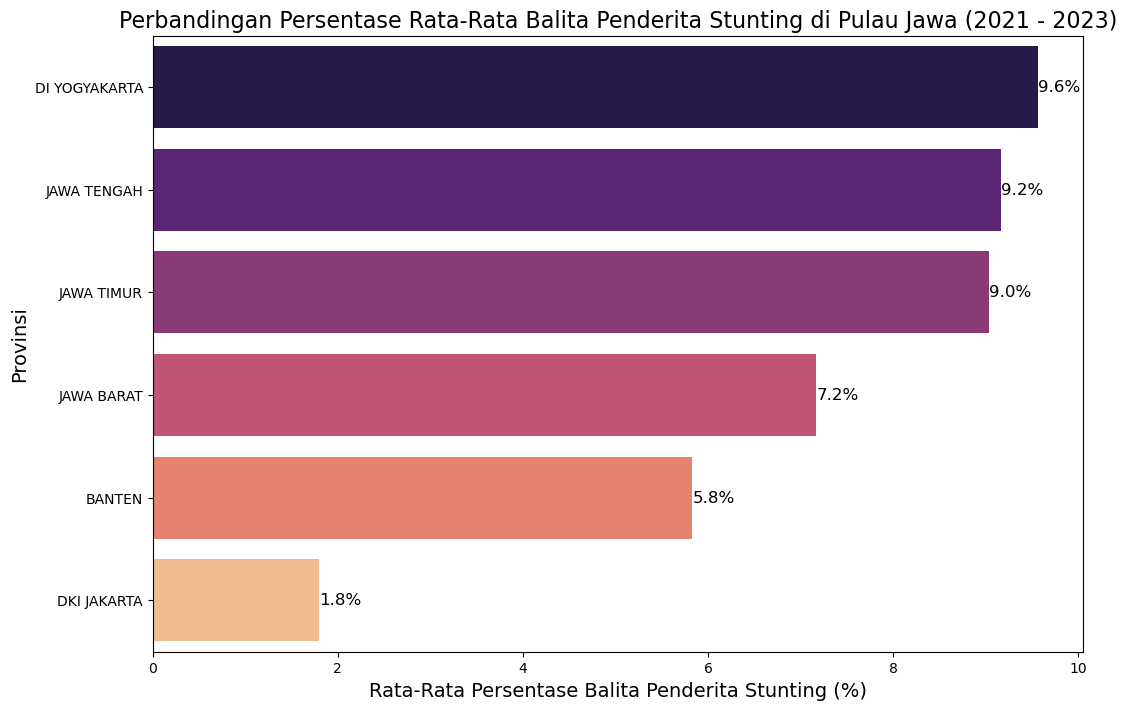

In [21]:
# Provinsi di Pulau Jawa
provinsi_jawa_list = ['JAWA TENGAH', 'JAWA TIMUR', 'JAWA BARAT', 'DKI JAKARTA', 'DI YOGYAKARTA', 'BANTEN']

# Filter data untuk provinsi di Pulau Jawa
provinsi_jawa = rata_rata_df_provinsi[rata_rata_df_provinsi['Provinsi'].isin(provinsi_jawa_list)]

# Mengurutkan data dari nilai tertinggi ke terendah
provinsi_jawa_sorted = provinsi_jawa.sort_values(by='% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun', ascending=False)

# Ploting Grafik
plt.figure(figsize=(12, 8))
sns.barplot(x='% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun', y='Provinsi', data=provinsi_jawa_sorted, palette='magma')


for index, value in enumerate(provinsi_jawa_sorted['% Rata-Rata Balita Penderita Stunting Dalam 3 Tahun']):
    plt.text(value, index, f'{value:.1f}%', va='center', fontsize=12, color='black')


plt.title('Perbandingan Persentase Rata-Rata Balita Penderita Stunting di Pulau Jawa (2021 - 2023)', fontsize=16)
plt.xlabel('Rata-Rata Persentase Balita Penderita Stunting (%)', fontsize=14)
plt.ylabel('Provinsi', fontsize=14)
plt.show()


### Jawa Tengah vs Nasional

In [22]:
# Filter data untuk Provinsi Jawa Tengah
df_jawa_tengah_2021 = df_2021[df_2021['Provinsi'] == 'JAWA TENGAH']
df_jawa_tengah_2022 = df_2022[df_2022['Provinsi'] == 'JAWA TENGAH']
df_jawa_tengah_2023 = df_2023[df_2023['Provinsi'] == 'JAWA TENGAH']

# Menggabungkan data jumlah balita dari tahun 2021, 2022, dan 2023
jumlah_balita_jawa_tengah = pd.DataFrame({
    'Tahun': ['2021', '2022', '2023'],
    'Jumlah Balita': [
        df_jawa_tengah_2021['Jumlah Balita'].sum(),
        df_jawa_tengah_2022['Jumlah Balita'].sum(),
        df_jawa_tengah_2023['Jumlah Balita'].sum()
    ]
})

# Menggabungkan data persentase stunting dari tahun 2021, 2022, dan 2023
persentase_stunting_jawa_tengah = pd.DataFrame({
    'Tahun': ['2021', '2022', '2023'],
    'Persentase Stunting (%)': [
        df_jawa_tengah_2021['Persentase Stunting %'].mean(),
        df_jawa_tengah_2022['Persentase Stunting %'].mean(),
        df_jawa_tengah_2023['Persentase Stunting %'].mean()
    ]
})

df_jawa_tengah = pd.concat([jumlah_balita_jawa_tengah, persentase_stunting_jawa_tengah.drop('Tahun', axis=1)], axis=1)

# Buat DataFrame baru untuk Provinsi Jawa Tengah
print("DataFrame untuk Provinsi Jawa Tengah:")
df_jawa_tengah


DataFrame untuk Provinsi Jawa Tengah:


,Tahun,Jumlah Balita,Persentase Stunting (%)
0,2021,2046602,9.0
1,2022,1964618,9.4
2,2023,2051484,9.1


In [23]:
rata_rata_jawa_tengah = df_jawa_tengah['Persentase Stunting (%)'].mean()

In [24]:
# Menghitung jumlah total balita penderita stunting dari df_2021, df_2022, dan df_2023
total_balita_penderita_stunting_2021 = df_2021['Jumlah Total Balita Penderita Stunting'].sum()
total_balita_penderita_stunting_2022 = df_2022['Jumlah Total Balita Penderita Stunting'].sum()
total_balita_penderita_stunting_2023 = df_2023['Jumlah Total Balita Penderita Stunting'].sum()

# Menghitung jumlah total balita dari df_2021, df_2022, dan df_2023
total_balita_2021 = df_2021['Jumlah Balita'].sum()
total_balita_2022 = df_2022['Jumlah Balita'].sum()
total_balita_2023 = df_2023['Jumlah Balita'].sum()

# Menghitung persentase rata-rata balita penderita stunting dari setiap tahun
persentase_stunting_2021 = total_balita_penderita_stunting_2021 / total_balita_2021 * 100
persentase_stunting_2022 = total_balita_penderita_stunting_2022 / total_balita_2022 * 100
persentase_stunting_2023 = total_balita_penderita_stunting_2023 / total_balita_2023 * 100

# Menghitung rata-rata persentase stunting untuk semua tahun
rata_rata_stunting_nasional = (persentase_stunting_2021 + persentase_stunting_2022 + persentase_stunting_2023) / 3

# Buat dataframe baru untuk % Rata-Rata Balita Penderita Stunting Dalam 3 Tahun untuk semua provinsi
df_rata_rata_stunting_nasional = pd.DataFrame({
    'Tahun': ['2021', '2022', '2023'],
    'Rata-Rata Persentase Stunting Nasional': [persentase_stunting_2021, persentase_stunting_2022, persentase_stunting_2023]
})

print("DataFrame untuk Rata-Rata Persentase Stunting Nasional:")
df_rata_rata_stunting_nasional


DataFrame untuk Rata-Rata Persentase Stunting Nasional:


,Tahun,Rata-Rata Persentase Stunting Nasional
0,2021,9.494791
1,2022,8.363978
2,2023,7.124260


In [25]:
rata_rata_nasional = df_rata_rata_stunting_nasional['Rata-Rata Persentase Stunting Nasional'].mean()

In [26]:
print('Perbandingan Persentase Rata - Rata Balita Penderita Stunting Dalam 3 Tahun (2021, 2022, 2023) antara Provinsi Jawa Tengah dan Nasional ')
print('JAWA TENGAH  : ', rata_rata_jawa_tengah.round(1))
print('NASIONAL     : ', rata_rata_nasional.round(1))

Perbandingan Persentase Rata - Rata Balita Penderita Stunting Dalam 3 Tahun (2021, 2022, 2023) antara Provinsi Jawa Tengah dan Nasional 
JAWA TENGAH  :  9.2
NASIONAL     :  8.3
